In [1]:
#!pip3 install -U pandas-profiling[notebook]
#pip3 install MarkupSafe
#!jupyter nbextension enable --py widgetsnbextension
#!pip install pandas_profiling
#!pip install markupsafe==2.0.1
#!pip install --user --upgrade aws-sam-cli




In [2]:
# Import some required packages/libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline

sns.set_style(style = "darkgrid")
plt.rcParams['figure.figsize'] = [5.0, 8.0] # make plot sizes, relatively larger than the normal notebook


In [3]:
#pip install pandas-profiling 
from pandas_profiling import ProfileReport

In [4]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\PYTHON'

In [5]:
# Change the current working directory
#os.chdir('File Address')

In [6]:
#Load the dataset
promo = pd.read_csv("C:/Users/hp/Desktop/PYTHON/BYOP GG HR Analytics Promotion prediction Raw Data File.csv") #, index_col = ["employee_id"])

In [38]:
promo.head(100)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,43923,Analytics,region_14,Bachelor's,m,sourcing,1,31,4.0,4,0,86.0,0
96,64109,Technology,region_26,Bachelor's,f,sourcing,1,23,NaN,1,0,77.0,0
97,41983,Operations,region_2,Bachelor's,f,sourcing,1,33,3.0,5,0,57.0,0
98,21440,Sales & Marketing,region_31,Bachelor's,m,other,1,41,3.0,12,0,52.0,0


In [8]:
#to check column name for spaces
print(promo.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')


In [9]:
#Normalization vs Standardization 

#Perform Scaling for - KNN, Kmeans, CNN -
#Do not perform scaling for - Decision Tree, Random Forest, XG Boost, Bagging and boosting technique

#called as feature scaling
#Normalization: To reduce the dimension of Data, if there is large difference in the values present in the column
#to bring the values b/w 0 and 1, one use Normalization


##Code: from sk.preprocessing import MinMaxScalar
#scaling=MinMaxScalar()
#scaling.fit_transform(df['Col1', 'col2'])


##Standardization(z-score Normalization) z - (x-mu)/sigma

#code: from sk.preprocessing import StandardScalar
#scaling = Standardscalar()
#scaling.fit_transform(df['Col1', 'col2'])


In [12]:
#Outlier detection technique

#z-score - z - (x-mu)/sigma   condition - for Std Normal distribution(SND) mu = 0 and sigma = 1
#IQR - 75% - 25% is inter quartile range


#ways to find outlier

# 1. Scatter Plot
# 2. Box Plot
# 3. using z score
# 4. using the IQR


### 3. using z score - function to detect outlier

#outlier=[]
#    def detect_outliers(data):
#        threshold=3
#        mean = np.mean(data)
#        std = np.std(data)
#        
#        for i in data:
#                z_score = (i - mean)/std
#                if np.abs(z_score) > thershold:
#                    outlier.append(i)
#                return outliers
            
#outlier_pt = detect_outliers(dataset)
#outlier_pt



### 4. using the IQR

#Steps:
#    1. Arrange the data in ascending order
#    2. Cal the first Quartile and 3rd Quartile
#    3. Find q3 - q1
#    4. Find lower bound value q1*1.5
#    5. Find Upper bound value q3*1.5
#code:    
#q1, q3 = np.percentile(dataset,[25,75])
#print(q1,q3)

#find the IQR

#iqr_value = q3-q1
#print(iqr_value)

#lower_bound_val = q1 -(1.5*iqr_value)
#Upper_bound_val = q3 +(1.5*iqr_value)

#anything outside above mentioned range is an outlier 

In [13]:
#PCA - Principal component Analysis - also called as dimensionality reduction
#we need to remove inconsistency, redundant data and highly correlated data 
# Steps: 
#        1. Standardization of data - scaling the values in such as way that all values lies in similar range
#        2. Computing covariance matrix - Correlation b/w the different variables of the dataset
#        3. Calculate the eigenvetors and eigenvalues - 
#        4. Computing the principal component
#        5. Reducing the dimension of the data 



In [14]:
#to replace space in all column name at once
#promo.columns = promo.columns.str.strip() # Leading and trailing
#promo.columns = promo.columns.str.lstrip() # Leading only
#promo.columns = promo.columns.str.rstrip() # Trailing only
#promo.columns = promo.columns.str.replace(' ','_') #to replace space in column with other underscore

In [15]:
# Complete EDA in one command 
#promo.profile_report()

In [16]:
#Distribution analysis of numerical and categorical columns
promo.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808.0,NaN,NaN,NaN,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808.0,NaN,NaN,NaN,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,NaN,NaN,NaN,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,NaN,NaN,NaN,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,NaN,NaN,NaN,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0


In [17]:
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [18]:
# to find duplicates if any 
promo.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54803    False
54804    False
54805    False
54806    False
54807    False
Length: 54808, dtype: bool

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

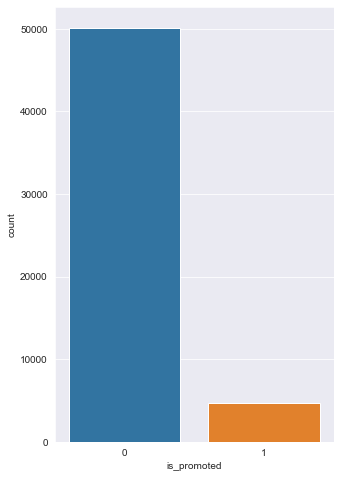

In [19]:
sns.countplot(x = "is_promoted", data = promo)

Note: Only 1/10th of the employees promoted  

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

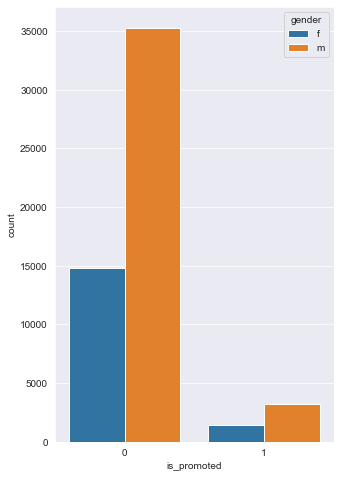

In [20]:
sns.countplot(x = "is_promoted", hue = "gender", data = promo)

Note: It seems there is no such bias in giving promotion.

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

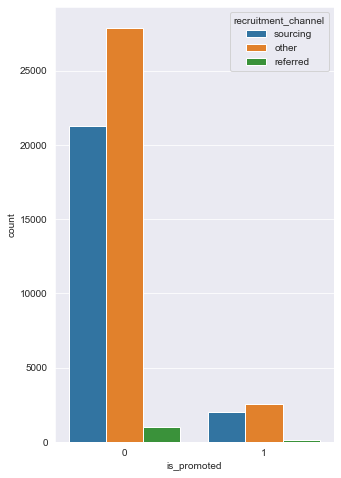

In [21]:
sns.countplot(x = "is_promoted", hue = "recruitment_channel", data = promo)

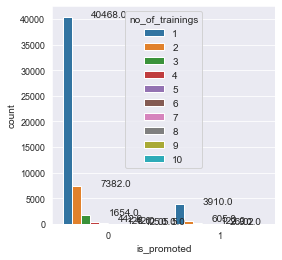

In [22]:
fig = plt.figure(figsize =(4, 4))
#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=9)
ax = sns.countplot(x = "is_promoted", hue = "no_of_trainings", data = promo)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

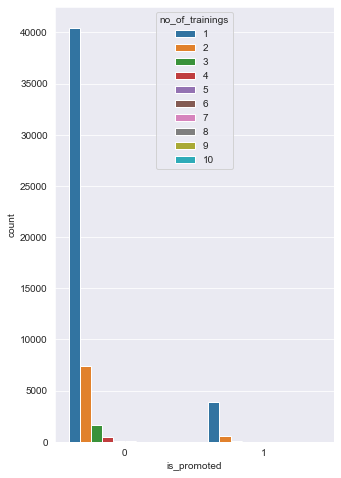

In [23]:
sns.countplot(x = "is_promoted", hue = "no_of_trainings", data = promo)

In [24]:
# groupby and count()
mean_ages = promo.groupby(['gender','education'])['is_promoted'].count()
display(mean_ages)

gender  education       
f       Bachelor's          10854
        Below Secondary       289
        Master's & above     4778
m       Bachelor's          25815
        Below Secondary       516
        Master's & above    10147
Name: is_promoted, dtype: int64

In [25]:
# groupby and count()
mean_ages = promo.groupby(['education'])['education'].count()
display(mean_ages)

education
Bachelor's          36669
Below Secondary       805
Master's & above    14925
Name: education, dtype: int64

In [26]:
# groupby and Mean()
mean_ages1 = promo.groupby(['gender','education'])['age'].mean()
display(mean_ages1)

gender  education       
f       Bachelor's          33.440667
        Below Secondary     23.598616
        Master's & above    39.289242
m       Bachelor's          33.447143
        Below Secondary     23.968992
        Master's & above    39.382478
Name: age, dtype: float64

In [27]:
# To check the correlation among numerical columns
promo.select_dtypes(['float64','int64']).corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,0.008420,-0.000661,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.044430,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.049500,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075474,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.039381,-0.010670
awards_won,0.008420,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.073963,0.195871
avg_training_score,-0.000661,0.044430,-0.049500,0.075474,-0.039381,0.073963,1.000000,0.184386
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.195871,0.184386,1.000000


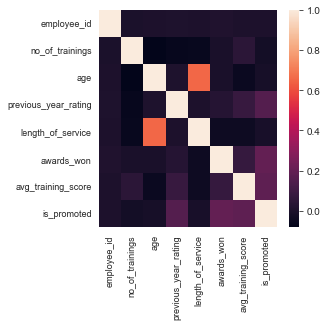

In [28]:
#Set plot size
fig = plt.figure(figsize =(4, 4))
#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=9)

sns.heatmap(promo.select_dtypes(['float64' , 'int64']).corr())
plt.show()

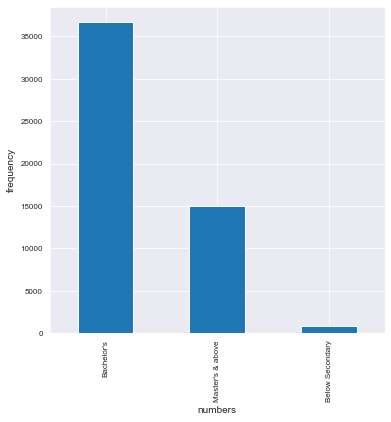

In [29]:

fig, ax = plt.subplots(figsize =(6, 6))

#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=8)

promo['education'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of Employees based on highest education level'}, xlabel='education', ylabel='count'>

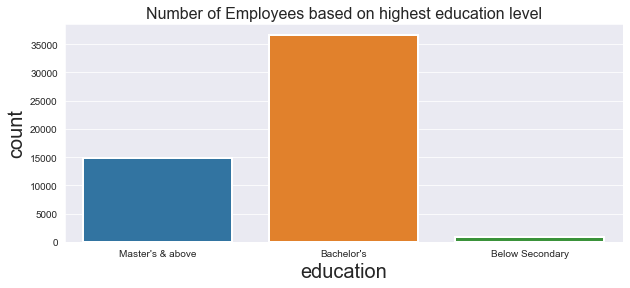

In [30]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,4))

# Set label for x-axis
ax.set_xlabel( "Education" , size = 20 )
  
# Set label for y-axis
ax.set_ylabel( "Number of Employees" , size = 20 )

# Set title for figure
plt.title( "Number of Employees based on highest education level" , size = 16 )

#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=10)

#Plot using Seaborn library
sns.set_context('poster')
sns.countplot('education',data = promo)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='count'>

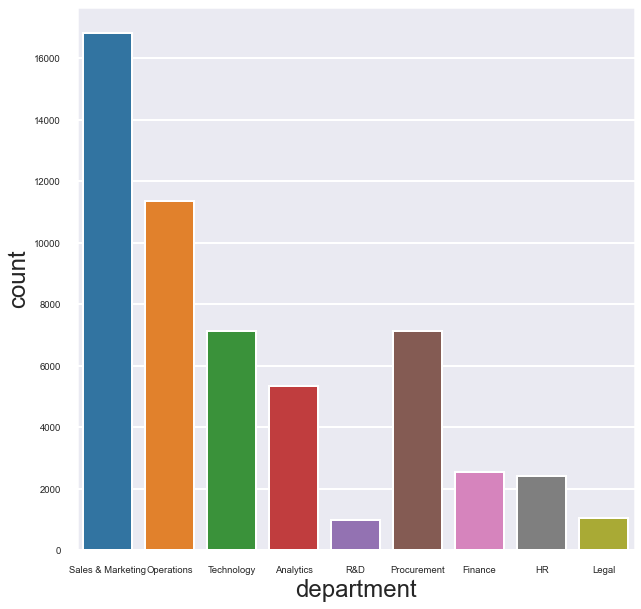

In [31]:

fig, ax = plt.subplots(figsize=(10,10))
plt.tick_params(axis='both', which='major', labelsize=9.5)
sns.set_context('poster')
sns.countplot('department',data = promo)

(array([  606., 10716.,  8466.,  9004.,  4571.,  4652.,  4915.,  7154.,
         1801.,   363.]),
 array([39., 45., 51., 57., 63., 69., 75., 81., 87., 93., 99.]),
 <BarContainer object of 10 artists>)

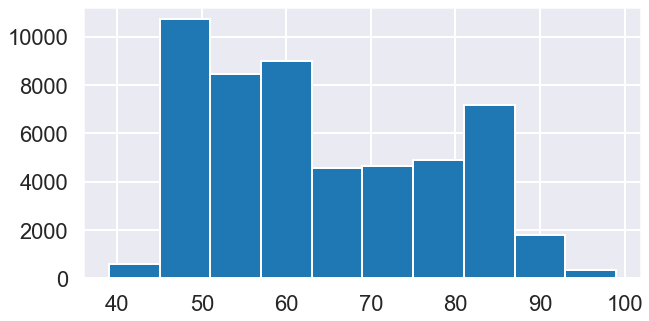

In [32]:
fig = plt.figure(figsize =(10, 5))
plt.hist(promo["avg_training_score"])

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <BarContainer object of 10 artists>)

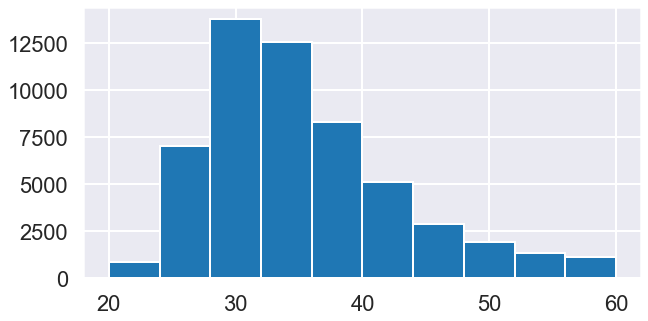

In [33]:
fig = plt.figure(figsize =(10, 5))
plt.hist(promo["age"])

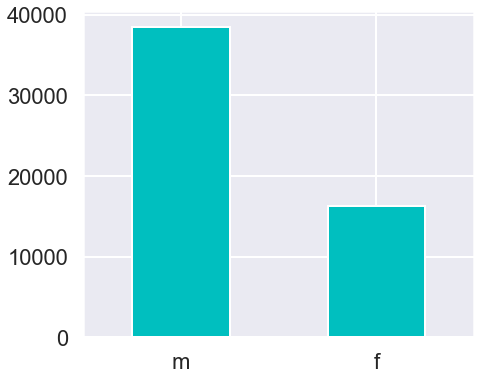

In [34]:
gender = promo['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="c")

In [35]:
#Scatter Plot
#sns.scatterplot(promo['awards_won'],promo['avg_training_score'])

# Draw a pair plot

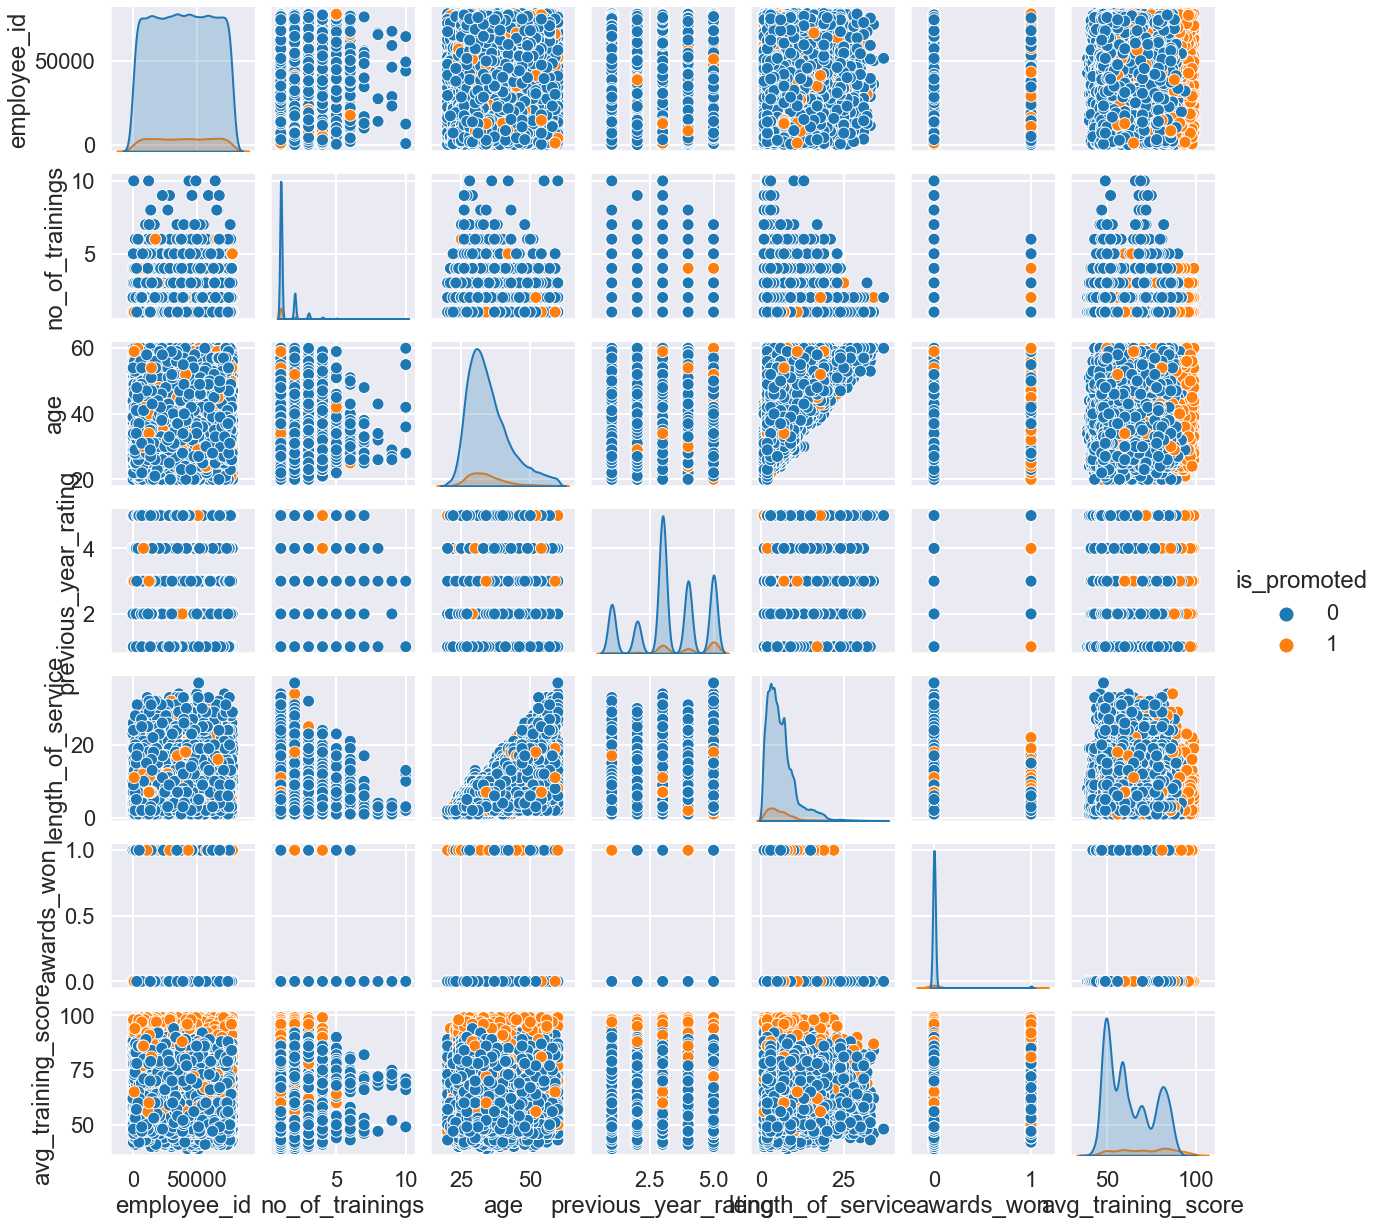

In [36]:
sns.pairplot(promo,hue = 'is_promoted')


#Here if in this pair plot mostly the data points of two independent variables can be seperated by linear line 
#and there is no overlapping use Logistic regression for classification problem.
#If the data points are overlapping (50%) use either decision tree or random forest or XG boost (ensemble methods)
#If alomost all the data points are overlapping use KNN (it is based on eucledian distance .

In [37]:
#Feature Scaling
#1.Standard scalar scaling - to scale down value for large values 
#only for Linear regression/KNN/CNN/RNN

from sk.preprocessing import StandardScalar


ModuleNotFoundError: No module named 'sk'

# Treatment of Missing values

In [ ]:
#We can drop the null value rows if they are very less as compare to the data, using the code below:
#df.dropna(inplace = True)

In [ ]:
# Sum of null values in each column
promo.isnull().sum()

In [ ]:
#IMPORTANT:
#To treat missing values in a categorical column - apply classifier algo  - remove missing value from train dataset
# put missing value data in test dataset # run the model with train data set and predict the missing value from test data.

In [ ]:
#Finding the mean of the column having NaN
mean_value=promo['avg_training_score'].mean()
  
mean_value

In [ ]:
# Replace NaNs in column avg_training_score with the mean of values in the same column
promo['avg_training_score'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(promo)

In [ ]:
# Replace NaNs in column 'education' with dummy value 'NA' in the same column
promo['education'].fillna(value='NA', inplace=True)
print('Updated Dataframe:')
print(promo)

In [ ]:
#Finding the mean of the column having NaN
mean_value1=promo['previous_year_rating'].mean()
 
mean_value1

In [ ]:
# Replace NaNs in column avg_training_score with the mean of values in the same column
promo['previous_year_rating'].fillna(value=mean_value1, inplace=True)
print('Updated Dataframe:')
print(promo)

In [ ]:
promo.head(2)

In [ ]:
# Trying Linear Regression Model and CHecking the Score

#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#lr= LinearRegression()
#Fit X and y 
#lr.fit(X_train, Y_train)
#ypred = lr.predict(X_test)
#print(lr.score(X_train, Y_train))
#print(lr.score(X_test, Y_test))

In [ ]:
#to check column name for spaces
print(promo.columns)

In [ ]:
## Dropping columns:- employee_id, department, region, gender, recruitment_channel
promo.drop(['employee_id', 'department', 'region', 'gender', 'recruitment_channel'],axis=1,inplace=True)

In [ ]:
#to check column name for spaces
print(promo.columns)

In [ ]:
#One hot encoding to convert all categorical variable in integer


In [ ]:
#Checking for the labels in the categorical parameters 
print(promo['education'].unique())


In [ ]:
#Checking for the label counts in the categorical parameters
promo['education'].value_counts()


In [ ]:
#To check unique value in the categorical or numerical value column
#df.col_name.unique()

In [ ]:
# One hot encoding
#df.get_dummies=df(['col_name']).head()
#dummy_data = pd.getdummies(df['col_name)'], drop_first = True) 
#when you are performing one hot encoding dont forget to delete one coulumn (dummy variable column)
#if you have more than 3 features in any column don't go for One hot Encoding

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
promo['education'] = le.fit_transform(promo['education'])
promo

In [ ]:
##Splitting The Dataset: Train and Test dataset
# Dropping predicting columns

y = promo['is_promoted']
x = promo.drop(['is_promoted'], axis = 1)
y = pd.DataFrame(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)



In [ ]:
# Trying Logistic Regression Model and Checking the Score

In [ ]:
#Train The Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
x_test.dtypes

In [ ]:
#predictions on testing data.

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
#Evaluation Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

In [ ]:
#L1 and L2

In [ ]:
#Selecting samples randomly based on condition
D1 = promo.query("is_promoted == 0").sample(n=4668)
D1

In [ ]:
#Selecting samples randomly based on condition
D11 = promo.query("is_promoted == 0").sample(n=4668)
D11

In [ ]:
#Selecting samples randomly based on condition
D111 = promo.query("is_promoted == 0").sample(n=4668)
D111

In [ ]:
promo[promo['is_promoted']==1].count()


In [ ]:
# selecting rows based on condition
D2 = promo[promo['is_promoted'] == 1]
D2

In [ ]:
# merge two data frames (same column name)
print('After merging 1:')
Mer_Data1 = pd.concat([D1, D2], axis=0) #Axis = 0 to merge rows below and 1 for Columns 
Mer_Data1

In [ ]:
# merge two data frames (same column name)
print('After merging 2:')
Mer_Data2 = pd.concat([D11, D2], axis=0) #Axis = 0 to merge rows below and 1 for Columns 
Mer_Data2

In [ ]:
# merge two data frames (same column name)
print('After merging:')
Mer_Data3 = pd.concat([D111, D2], axis=0) #Axis = 0 to merge rows below and 1 for Columns 
Mer_Data3

In [ ]:
#in case the Target variable has Categorical values, we need to map or convert these as numerical value:
#Y = df.Categor_col
#Y = Y.map({'Category1' : 0, 'Category2'= 1, 'Category3'= 2})

In [ ]:
#MERGE DATA 1
##Splitting The Dataset: Train and Test dataset 
# Dropping ,predicting columns

Y1 = Mer_Data1['is_promoted']
x1 = Mer_Data1.drop(['is_promoted'], axis = 1)
y1 = pd.DataFrame(Y1)

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.25, random_state = 0)

In [ ]:
#MERGE DATA 2
##Splitting The Dataset: Train and Test dataset 
# Dropping ,predicting columns

Y2 = Mer_Data1['is_promoted']
x2 = Mer_Data1.drop(['is_promoted'], axis = 1)
y2 = pd.DataFrame(Y2)

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.25, random_state = 0)

In [ ]:
#MERGE DATA 3
##Splitting The Dataset: Train and Test dataset 
# Dropping ,predicting columns

Y3 = Mer_Data1['is_promoted']
x3 = Mer_Data1.drop(['is_promoted'], axis = 1)
y3 = pd.DataFrame(Y3)

from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.25, random_state = 0)

In [ ]:
##MERGE DATA 1
#Train The Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x1_train, y1_train)

In [ ]:
##MERGE DATA 2
#Train The Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x2_train, y2_train)

In [ ]:
##MERGE DATA 3
#Train The Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x3_train, y3_train)

In [ ]:
#MERGE DATA 1
y1_pred = classifier.predict(x1_test)
y1_pred

In [ ]:
#MERGE DATA 2
y2_pred = classifier.predict(x2_test)
y2_pred

In [ ]:
#MERGE DATA 2
y3_pred = classifier.predict(x3_test)
y3_pred

In [ ]:
#MERGE DATA 1
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y1_test, y1_pred)
 
print ("Confusion Matrix : \n", cm1)

In [ ]:
#MERGE DATA 2
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y2_test, y2_pred)
 
print ("Confusion Matrix : \n", cm2)

In [ ]:
#MERGE DATA 3
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y3_test, y3_pred)
 
print ("Confusion Matrix : \n", cm3)

In [ ]:
#Sensitivity, Specificity, ROC(Receiver operating characteristic curve), AUC (Area under curve)

In [ ]:
#Sensitivity or Recall = TP / (TP + FN)
from sklearn.metrics import recall_score
Sens = recall_score(y1_test, y1_pred)
print ("Sensitivity :", Sens)

In [ ]:
#Precision = TP / (TP + FP)
from sklearn.metrics import precision_score
Precision = precision_score(y1_test, y1_pred)
print ("Precision :", Precision)

In [ ]:
#Specificity = TN / (TN + FP)

Speci = cm[0,0]/(cm[0,0]+cm[0,1])
print ("Specificity :", Speci)

In [ ]:
#MERGE DATA 1
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y1_test, y1_pred))

In [ ]:
#MERGE DATA 2
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y2_test, y2_pred))

In [ ]:
#MERGE DATA 3
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y3_test, y3_pred))

In [ ]:
#Plot ROC and compare AUC

from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y1_test, y1_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

# Set label for x-axis
ax.set_xlabel( "False Positive Rate -->" , size = 10 )
  
# Set label for y-axis
ax.set_ylabel( "True Positive Rate -->" , size = 10 )

# Set title for figure
plt.title( "Area Under the Curve" , size = 16 )

#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=8)

#Set Legend Size
plt.rc('legend',fontsize=20) # using a size in points

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)



plt.legend()

plt.show()

In [ ]:
##MERGE DATA 1
#Applying Random forest classifier in Mer_Data1
from sklearn.ensemble import RandomForestClassifier
# Create an instance of Random Forest Classifier

#forest = RandomForestClassifier(criterion='gini',
#                                 n_estimators=5,
#                                 random_state=1,
#                                 n_jobs=2)

#OR


forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state=0,)

# Fit the model

forest.fit(x1_train, y1_train)

# Measure model performance
#
y_pred = forest.predict(x1_test)
print('Accuracy: %.3f' % accuracy_score(y1_test, y1_pred))

In [ ]:
##MERGE DATA 2
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state=0,)

# Fit the model

forest.fit(x2_train, y2_train)

# Measure model performance
#
y_pred = forest.predict(x2_test)
print('Accuracy: %.3f' % accuracy_score(y2_test, y2_pred))

In [ ]:
##MERGE DATA 2
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state=0,)

# Fit the model

forest.fit(x3_train, y3_train)

# Measure model performance
#
y_pred = forest.predict(x3_test)
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print (classification_report(y1_test, y1_pred))